In [36]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models



# Define Autoencoder architecture
def create_autoencoder(input_dim, encoding_dim):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    model.add(layers.Dense(encoding_dim, activation='relu'))
    model.add(layers.Dense(input_dim, activation='sigmoid'))
    return model





# Path to your dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Images"

# Get a list of folder names (assuming they are named 1, 2, 3, ..., 120)
folder_names = [str(i) for i in range(1, 121)]

# List to store clustering results for each folder
all_folder_clusters = []
reduced_images_list = []  # List to store reduced images for the first 6 iterations

cntr = 0

for folder_name in folder_names:
    # Construct the path to the current folder
    folder_path = os.path.join(dataset_path, folder_name)

    # Get a list of image file paths in the current folder
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.png')]

    # Check if there are at least 5 images in the folder
    if len(image_paths) <= 5:
        print(f"Skipping folder {folder_name} as it has less than 5 images.")
        continue
    cntr = cntr + 1

    # Load and preprocess images
    images = [np.array(Image.open(path).convert('L')) for path in image_paths]

    # Flatten the images
    flattened_images = [image.flatten() for image in images]

    # Standardize the data
    scaler = StandardScaler()
    standardized_images = scaler.fit_transform(flattened_images)

    # Check the number of features after standardization
    num_features = standardized_images.shape[0]


    # Apply PCA for dimensionality reduction
    n_components = min(6, num_features)
    pca = PCA(n_components)
    reduced_images_pca = pca.fit_transform(standardized_images)
    # Create Autoencoder model outside the loop
    autoencoder = create_autoencoder(input_dim=n_components, encoding_dim=2)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder_encoder = models.Sequential(autoencoder.layers[:2])
    # Use Autoencoder for additional feature extraction
    autoencoder.fit(reduced_images_pca, reduced_images_pca, epochs=10, batch_size=32, shuffle=True, verbose=0)

    # Extract features using the encoder part of the Autoencoder
    extracted_features = autoencoder_encoder.predict(reduced_images_pca)

    # Save reduced images for the first 6 iterations
    if cntr <= 6:
        reduced_images_list.append(extracted_features)
    else:
        break

    # Use K-Means clustering on the extracted features
    kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(extracted_features)

    # Append the clustering results for the current folder to the list
    all_folder_clusters.append(clusters)


1/1 [==============================] - 1s 1s/step
Skipping folder 2 as it has less than 5 images.
Skipping folder 3 as it has less than 5 images.
1/1 [==============================] - 0s 68ms/step
Skipping folder 6 as it has less than 5 images.
Skipping folder 7 as it has less than 5 images.
2/2 [==============================] - 1s 739ms/step
Skipping folder 9 as it has less than 5 images.
1/1 [==============================] - 0s 69ms/step
Skipping folder 12 as it has less than 5 images.
Skipping folder 13 as it has less than 5 images.
1/1 [==============================] - 0s 112ms/step


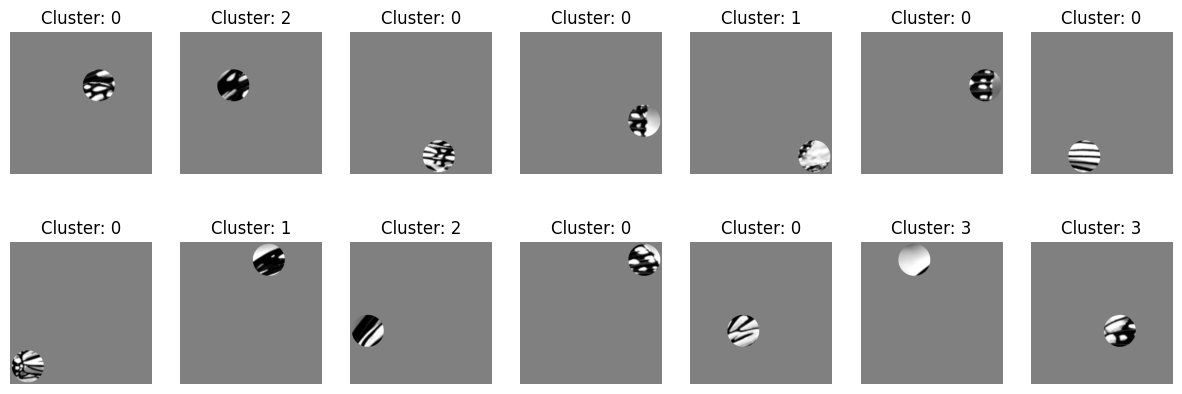

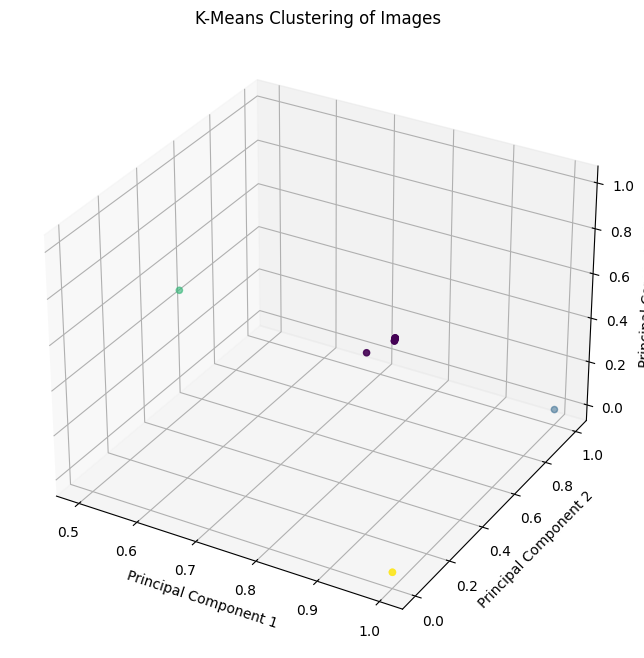

In [37]:
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

clusters = all_folder_clusters[0]
image_folder = "/content/drive/MyDrive/Colab Notebooks/Images/1"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()
reduced_images = reduced_images_list[0]
# Visualize the results in 3D
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

ax_3d.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=clusters, cmap='viridis')
ax_3d.set_title('K-Means Clustering of Images')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')

plt.show()


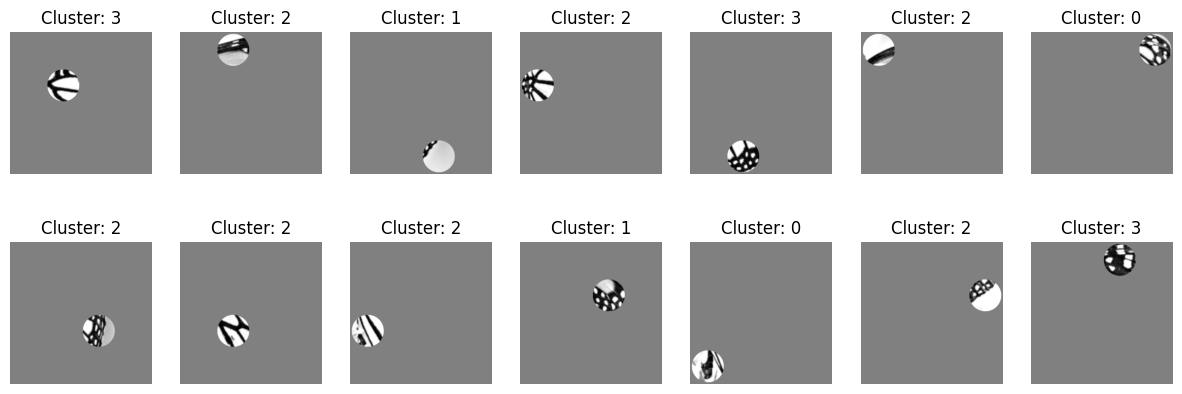

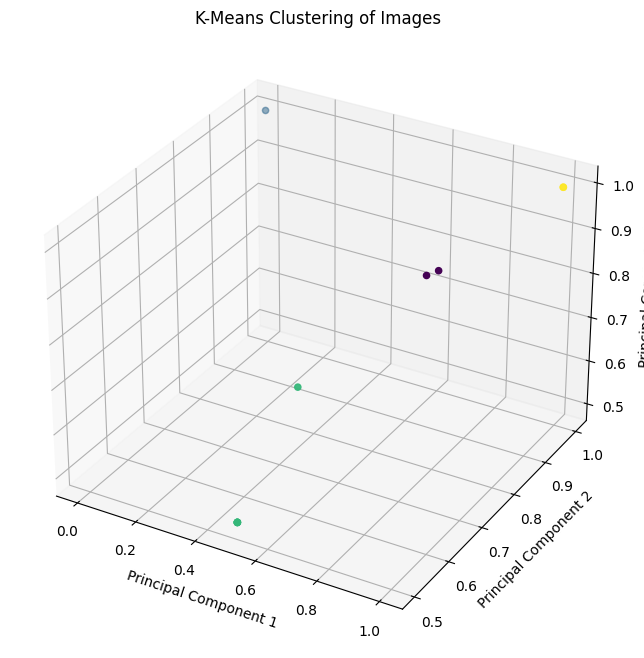

In [38]:
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

clusters = all_folder_clusters[2]
image_folder = "/content/drive/MyDrive/Colab Notebooks/Images/5"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()
reduced_images = reduced_images_list[2]
# Visualize the results in 3D
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

ax_3d.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=clusters, cmap='viridis')
ax_3d.set_title('K-Means Clustering of Images')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')

plt.show()


40
['/content/drive/MyDrive/Colab Notebooks/Images/4/image1.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image5.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image8.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image3.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image7.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image2.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image6.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image9.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image4.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image27.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image15.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image30.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image16.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image23.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image18.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image14.png

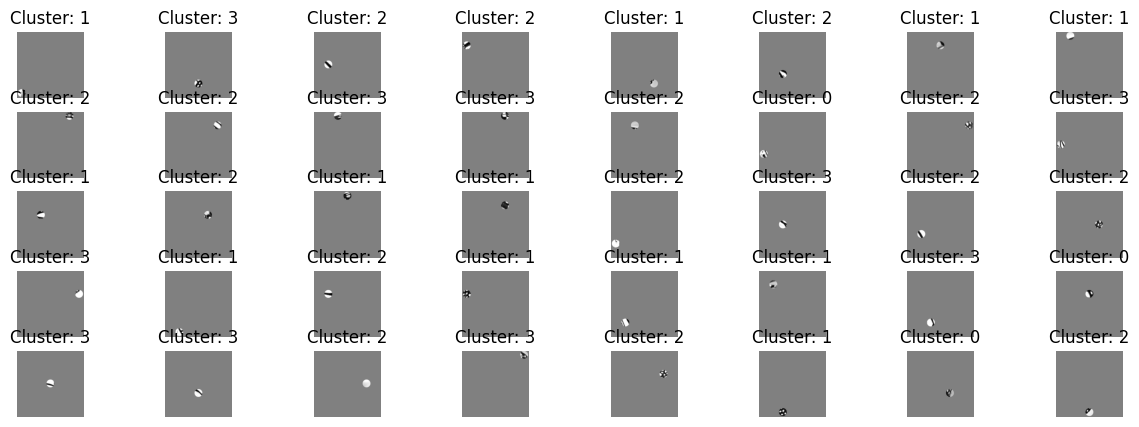

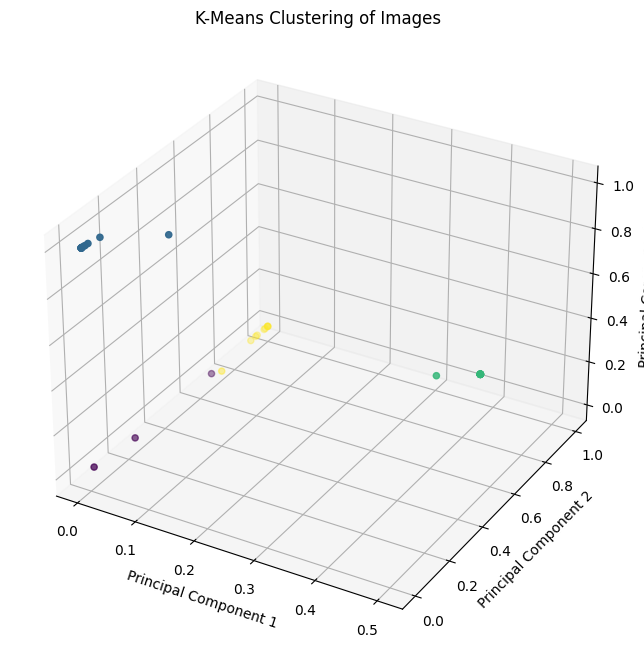

In [40]:
fig, axes = plt.subplots(5, 8, figsize=(15, 5))

clusters = all_folder_clusters[1]
print(clusters.size)
image_folder = "/content/drive/MyDrive/Colab Notebooks/Images/4"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()
print(image_paths)
# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()
reduced_images = reduced_images_list[1]
# Visualize the results in 3D
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

ax_3d.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=clusters, cmap='viridis')
ax_3d.set_title('K-Means Clustering of Images')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')

plt.show()
